In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/abhishek/Desktop/google.csv")
print(data.head())


        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


In [28]:
data.describe()

,Open,High,Low,Close,Volume
count,3145.000000,3145.000000,3145.000000,3145.000000,3.145000e+03
mean,382.514169,385.872099,378.737126,382.350248,4.205708e+06
std,213.520466,214.636421,212.113835,213.469899,3.878100e+06
min,87.740000,89.290000,86.370000,87.580000,5.211410e+05
25%,232.380000,234.890000,230.400000,232.440000,1.889613e+06
50%,296.280000,298.520000,293.640000,296.050000,2.811069e+06
75%,544.000000,548.220000,539.850000,543.650000,5.232088e+06
max,1005.490000,1008.610000,996.620000,1004.280000,4.118289e+07


In [29]:

def remove_data(data):

    item = []
    open = []
    close = []
    volume = []
    
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        i_counter += 1

    stocks = pd.DataFrame()

    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    return stocks


stocks = remove_data(data)


print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open   Close    Volume
0     0   98.80  101.46  15860692
1     1  100.77   97.35  13762396
2     2   96.82   96.85   8239545
3     3   97.72   94.37  10389803
4     4   95.42   97.02   9666175
---
      Item    Open   Close   Volume
3140  3140  990.00  972.09  1517912
3141  3141  961.60  948.09  2443602
3142  3142  950.66  961.01  2745568
3143  3143  951.35  937.82  3206674
3144  3144  943.99  929.68  2287662


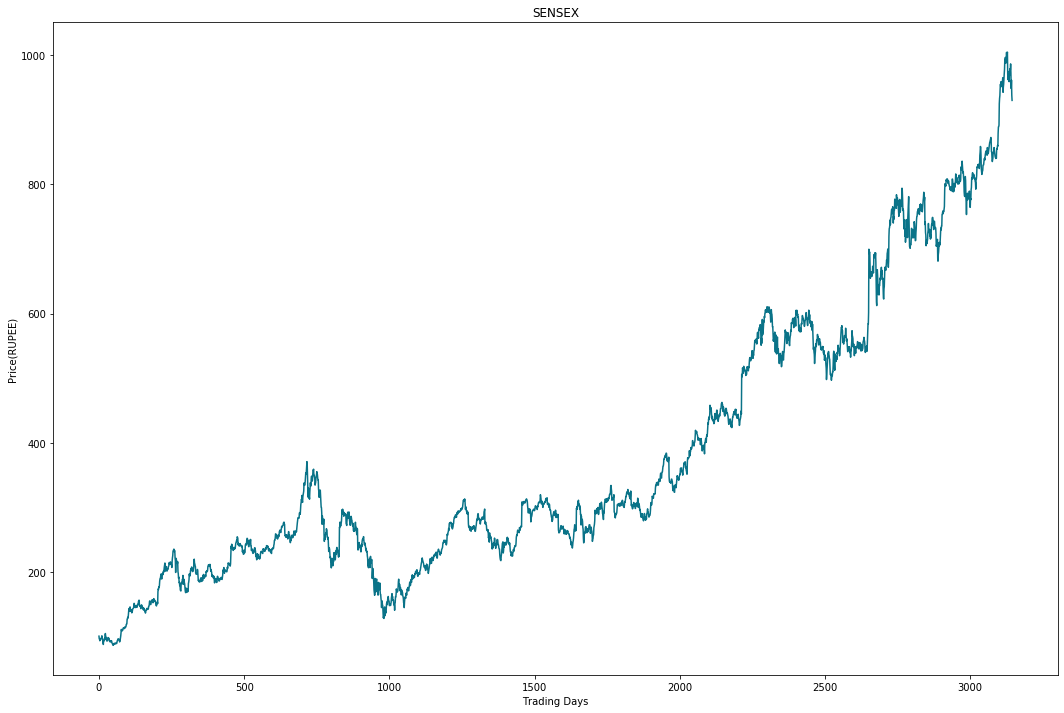

In [30]:

def price(x):
  
    return '$%1.2f' % x
def plot_basic(stocks, title='SENSEX', y_label='Price(RUPEE)', x_label='Trading Days'):

    fig, ax = plt.subplots(figsize=(18,12))
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()
plot_basic(stocks)

In [31]:
from sklearn.preprocessing import MinMaxScaler


def get_normalised_data(data):
   
    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data
stocks = get_normalised_data(stocks)
print(stocks.head())

   Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905


In [32]:
stocks.describe()

,Item,Open,Close,Volume
count,3145.000000,3145.000000,3145.000000,3145.000000
mean,1572.000000,0.321192,0.321556,0.090615
std,908.027624,0.232656,0.232868,0.095375
min,0.000000,0.000000,0.000000,0.000000
25%,786.000000,0.157603,0.158023,0.033655
50%,1572.000000,0.227230,0.227414,0.056317
75%,2358.000000,0.497151,0.497513,0.115857
max,3144.000000,1.000000,1.000000,1.000000


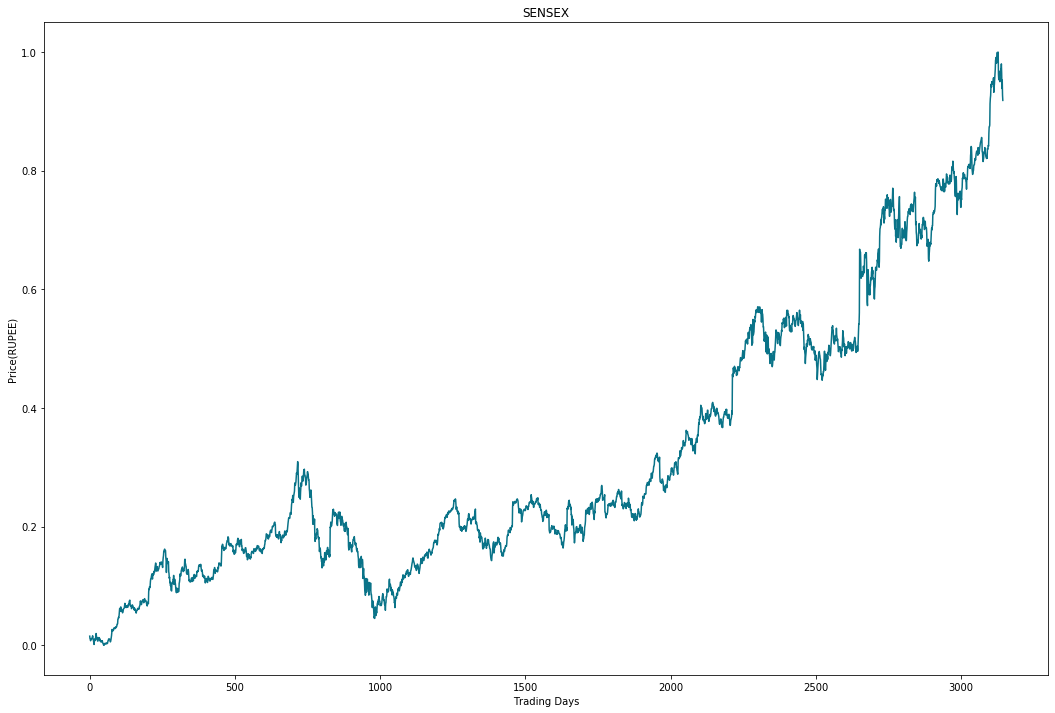

In [33]:
plot_basic(stocks)

In [34]:
stocks.to_csv('google_preprocessed.csv',index= False)

In [35]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905


In [36]:
def scale_range(x, input_range, target_range):
    
    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range
def train_test_split_linear_regression(stocks):
   
    feature = []
    label = []

    for index, row in stocks.iterrows():
        feature.append([(row['Item'])])
        label.append([(row['Close'])])

    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    split = .315
    split = int(math.floor(len(stocks['Item']) * split))
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range

X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


In [37]:
def build_model(X, y):
  
    linear_mod = linear_model.LinearRegression()  
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod.fit(X, y)  

    return linear_mod

model = build_model(X_train,y_train)

In [38]:
def predict_prices(model, x, label_range):

    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()

predictions = predict_prices(model,X_test, label_range)

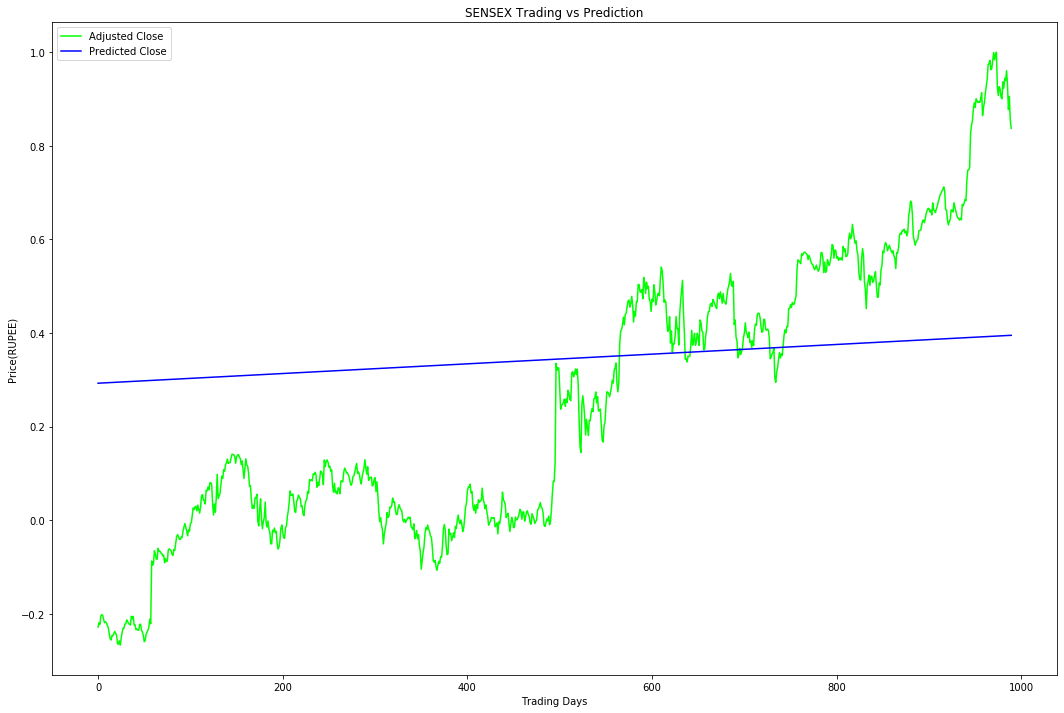

In [39]:
def plot_prediction(actual, prediction, title='SENSEX Trading vs Prediction', y_label='Price(RUPEE)', x_label='Trading Days'):
 
    fig = plt.figure(figsize=(18,12))
    ax = fig.add_subplot(111)

    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()

plot_prediction(y_test,predictions)

In [40]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


In [41]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold



stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


In [42]:
def unroll(data, sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
   
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['Close'].as_matrix()

    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['Close'].as_matrix()

    return x_train, x_test, y_train, y_test

import visualize as vs
import stock_data as sd
import LinearRegressionModel

X_train, X_test,y_train, y_test =sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


C:\Users\abhishek\stock_data.py:53: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
C:\Users\abhishek\stock_data.py:54: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = stocks[prediction_time:-test_data_cut]['Close'].as_matrix()
C:\Users\abhishek\stock_data.py:56: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
C:\Users\abhishek\stock_data.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = stocks[prediction_time - test_data_cut:]['Close'].as_matrix()


In [43]:
import time,lstm
def build_basic_model(input_dim, output_dim, return_sequences):
 
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.009973526000976562


In [44]:
model.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=1,
    validation_split=0.05)

Train on 2459 samples, validate on 130 samples
Epoch 1/1
2459/2459 [==============================] - 123s 50ms/step - loss: 7.4242e-04 - val_loss: 3.0884e-04


In [45]:
predictions = model.predict(X_test)

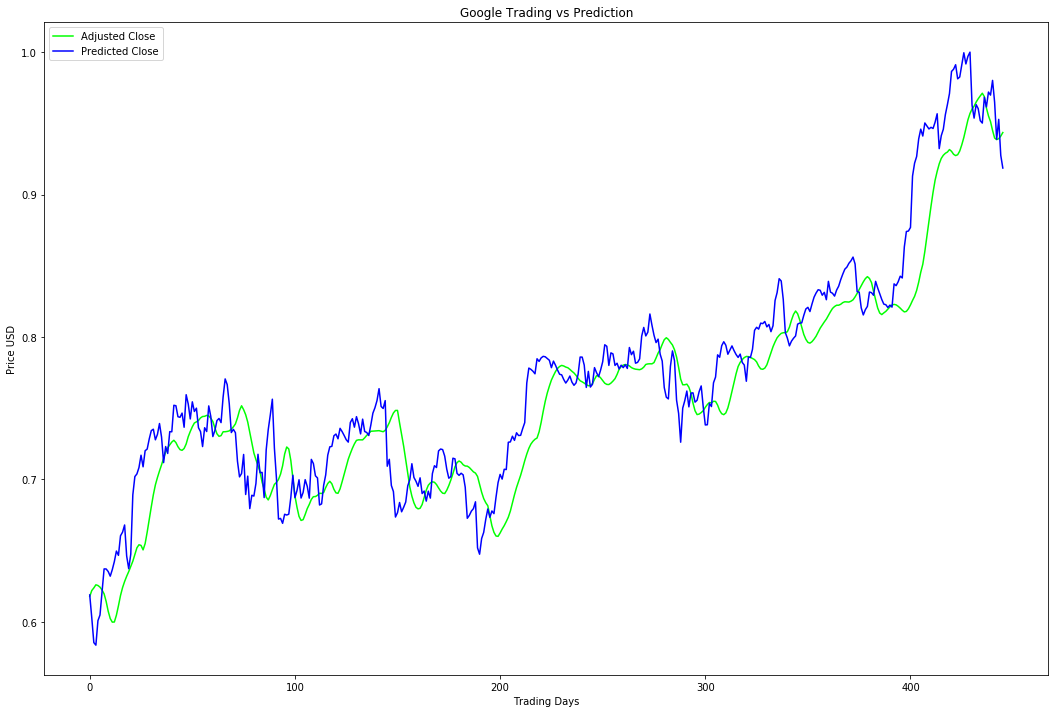

In [46]:
def plot_lstm_prediction(actual, prediction, title='SENSEX Trading vs Prediction', y_label='Price(RUPEE)', x_label='Trading Days'):
 
    fig = plt.figure(figsize=(18,12))
    ax = fig.add_subplot(111)

    plt.ylabel(y_label)
    plt.xlabel(x_label)


    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()

vs.plot_lstm_prediction(predictions, y_test)

In [47]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00026070 MSE (0.01614634 RMSE)
Test Score: 0.00091475 MSE (0.03024479 RMSE)


In [48]:

batch_size = 512
epochs = 20

def build_improved_model(input_dim, output_dim, return_sequences):
   
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()

model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.011967897415161133


In [49]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2459 samples, validate on 130 samples
Epoch 1/20
 - 4s - loss: 0.0377 - val_loss: 0.0169
Epoch 2/20
 - 2s - loss: 0.0072 - val_loss: 0.0094
Epoch 3/20
 - 2s - loss: 0.0043 - val_loss: 0.0142
Epoch 4/20
 - 2s - loss: 0.0021 - val_loss: 5.6372e-04
Epoch 5/20
 - 2s - loss: 0.0020 - val_loss: 5.2071e-04
Epoch 6/20
 - 2s - loss: 0.0011 - val_loss: 0.0032
Epoch 7/20
 - 2s - loss: 0.0014 - val_loss: 0.0012
Epoch 8/20
 - 2s - loss: 8.6454e-04 - val_loss: 4.0759e-04
Epoch 9/20
 - 2s - loss: 9.2520e-04 - val_loss: 3.6958e-04
Epoch 10/20
 - 2s - loss: 7.7499e-04 - val_loss: 0.0012
Epoch 11/20
 - 3s - loss: 8.2454e-04 - val_loss: 3.7395e-04
Epoch 12/20
 - 3s - loss: 7.4275e-04 - val_loss: 2.7074e-04
Epoch 13/20
 - 2s - loss: 7.1203e-04 - val_loss: 5.0916e-04
Epoch 14/20
 - 2s - loss: 6.6033e-04 - val_loss: 4.3560e-04
Epoch 15/20
 - 2s - loss: 6.9018e-04 - val_loss: 2.8692e-04
Epoch 16/20
 - 2s - loss: 6.6697e-04 - val_loss: 3.3335e-04
Epoch 17/20
 - 2s - loss: 6.7259e-04 - val_loss: 3.889

In [50]:
predictions = model.predict(X_test, batch_size=batch_size)

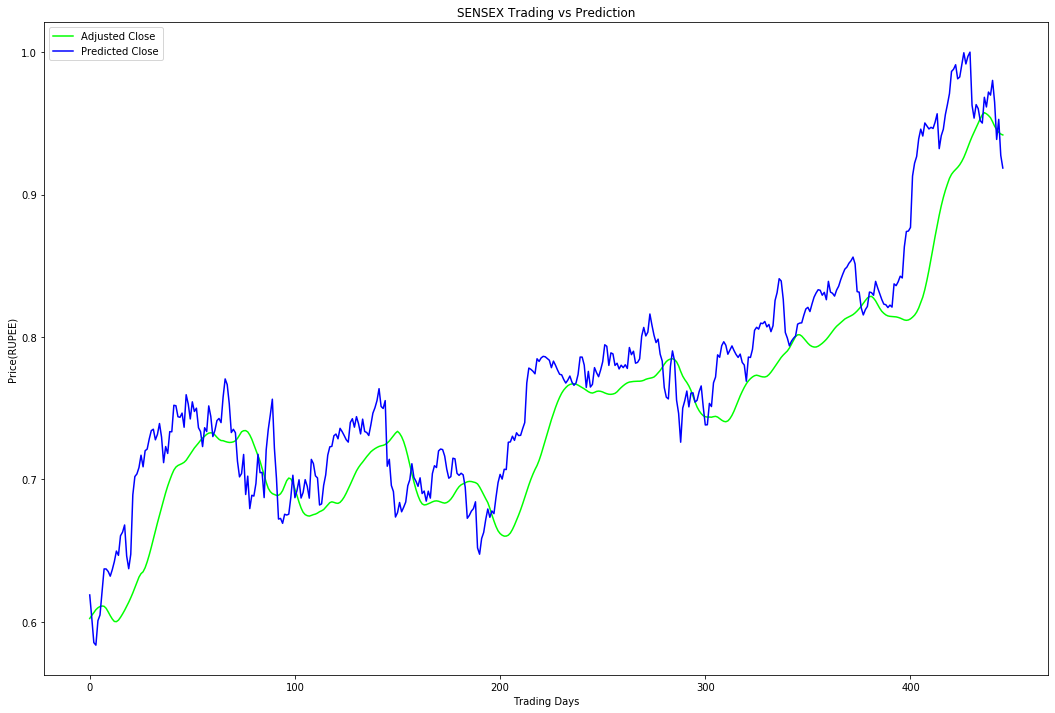

In [51]:
plot_lstm_prediction(predictions, y_test)

In [52]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00034588 MSE (0.01859789 RMSE)
Test Score: 0.00149994 MSE (0.03872906 RMSE)
